In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
titanic_data=pd.read_csv('/content/titanic_dataset .csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
 # view dimensions of dataset
titanic_data.shape

(891, 12)

In [84]:
# View top 5 rows of dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
# Get summary statistics of numerical columns
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [86]:
# Get information about the dataset, including column data types and missing values
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


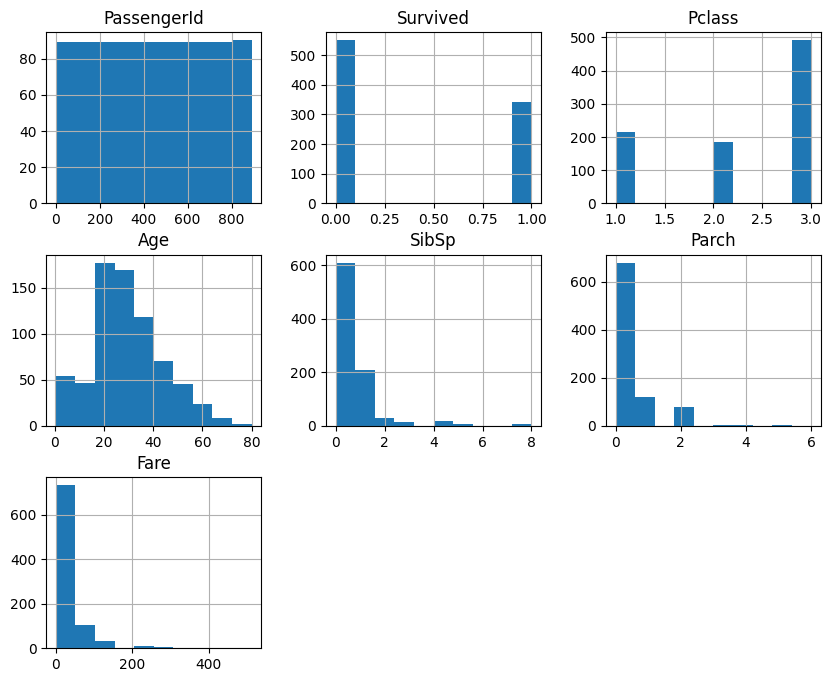

In [87]:
# to get the distribution of data in the numerical columns
graph = titanic_data.select_dtypes(include=['float64','int64'])
graph.hist(figsize=(10,8));

In [88]:
# Count the number of missing values in each column
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


For numerical variables: imputation using mean or median
For categorical variables: imputation using mode
Cabin Featueres has more than 75% of missing data in the dataset  so we are removing the Cabin column

In [89]:
drop_column = ['Cabin']
titanic_data.drop(drop_column, axis=1, inplace = True)

In [90]:
#handling missing values for numeric column
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
#handling missing values for categorical column
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [91]:
# Check if all missing value has been handled
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [92]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Correlation

<ipython-input-93-833eac417b72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), annot=True, cmap='BuPu', fmt=".2f")


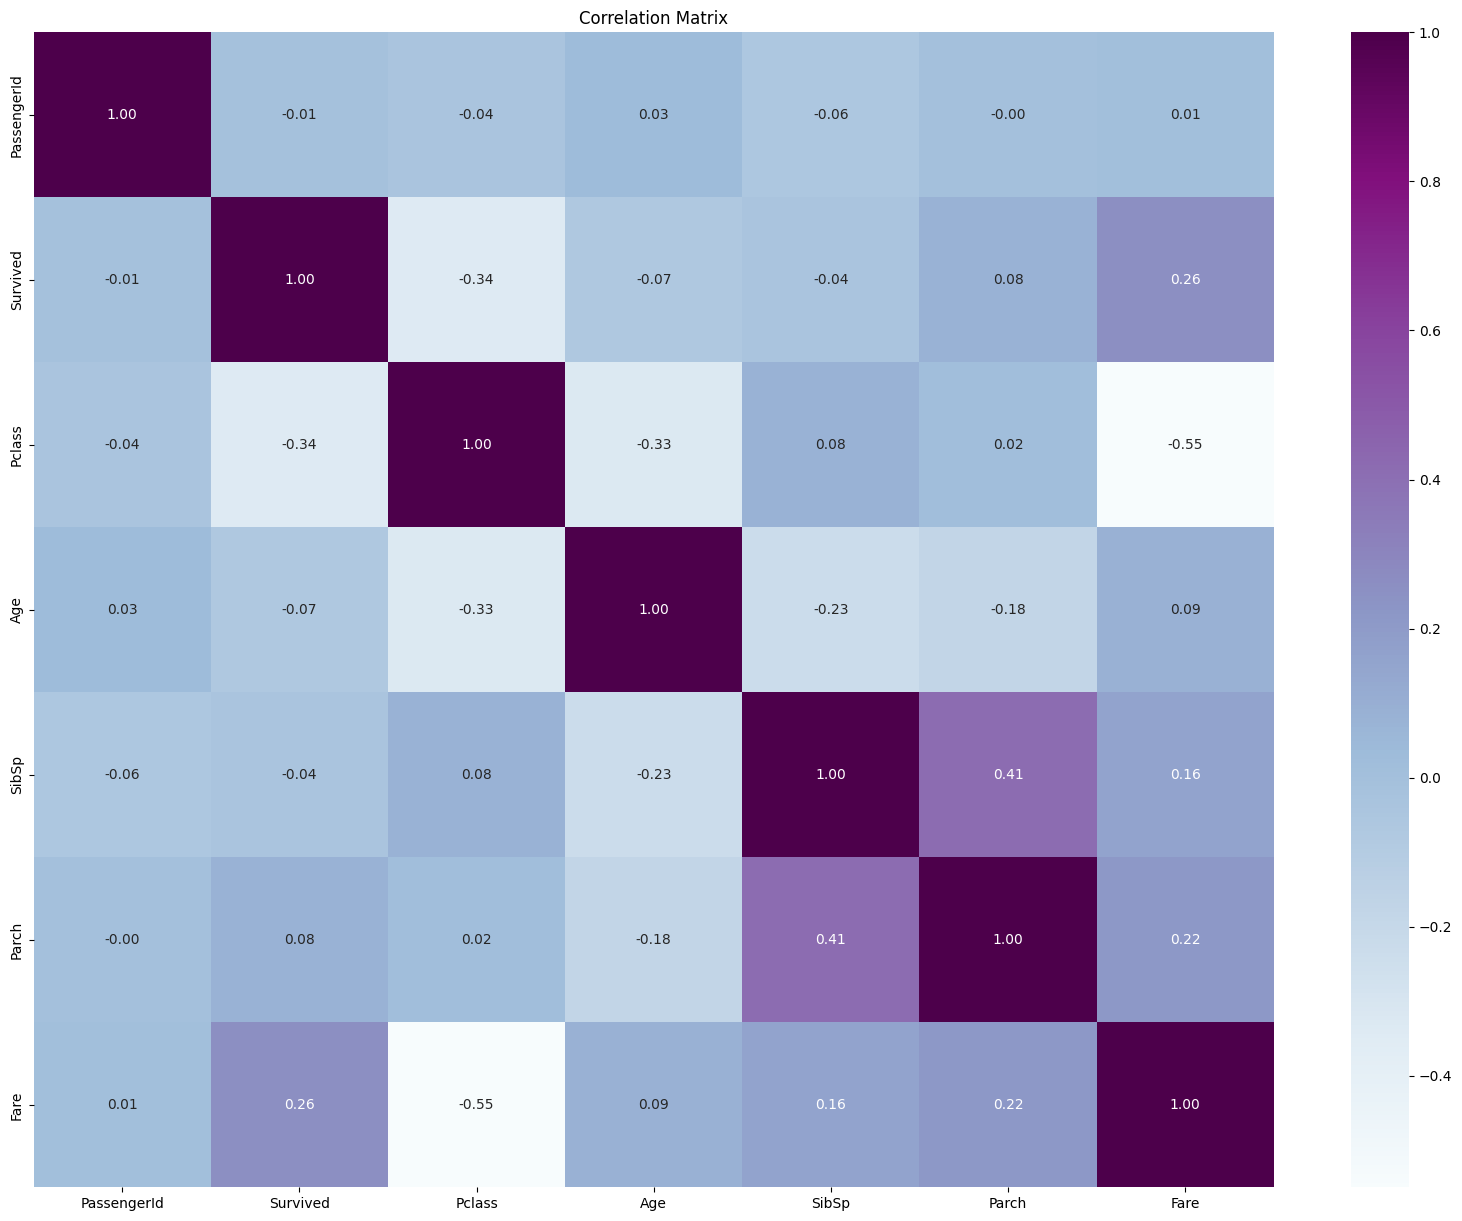

In [93]:
plt.figure(figsize=(20,15))
sns.heatmap(titanic_data.corr(), annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


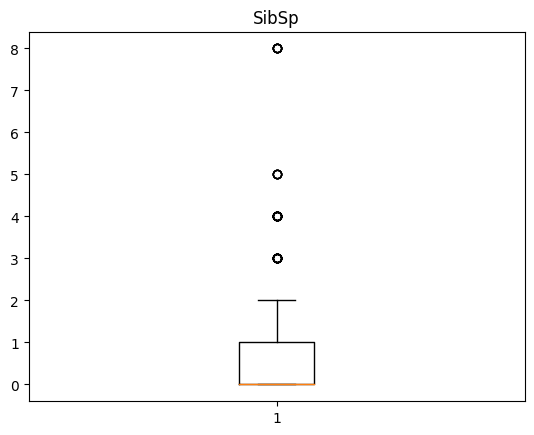

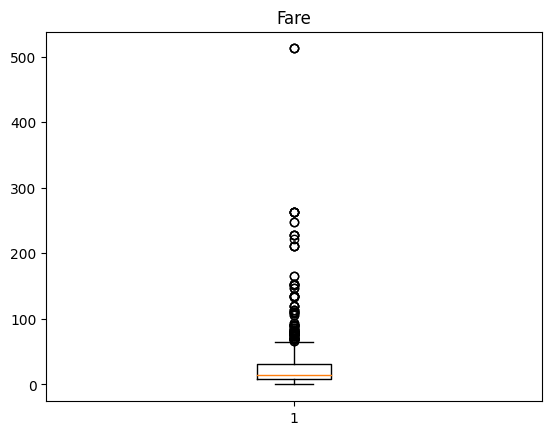

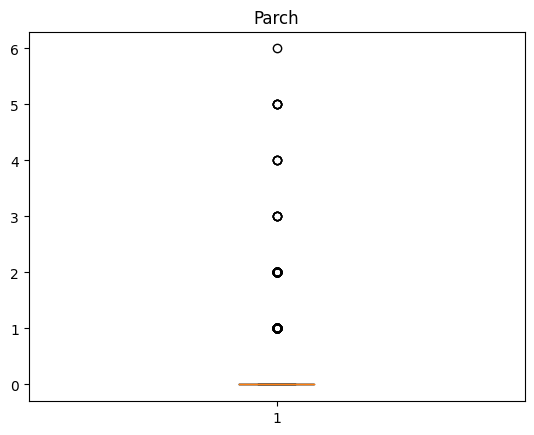

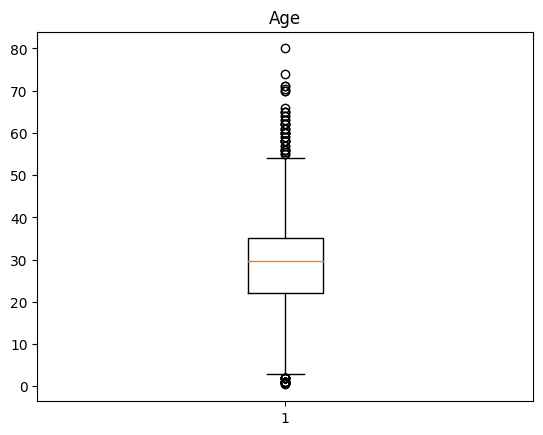

In [94]:
#finding outliers
num_columns = ['SibSp', 'Fare', 'Parch','Age']
for i in num_columns:
  plt.figure()
  plt.boxplot(titanic_data[i])
  plt.title(i)
  plt.show()

In [95]:
#Handling Outliers
def iqr_clipping(titanic_data, columns):
    for col in columns:
        Q1 = titanic_data[col].quantile(0.25)
        Q3 = titanic_data[col].quantile(0.75)
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        titanic_data[col] = titanic_data[col].clip(lower=low_lim, upper=up_lim)
    return titanic_data
columns = ['Age','SibSp','Parch','Fare']
data = iqr_clipping(titanic_data, columns)

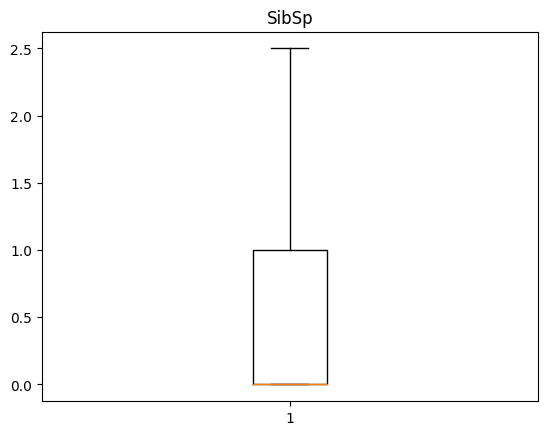

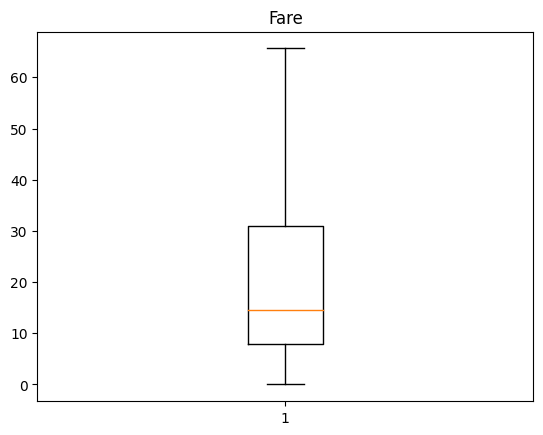

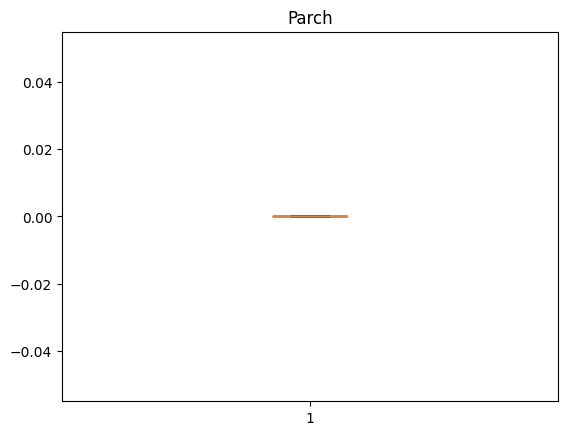

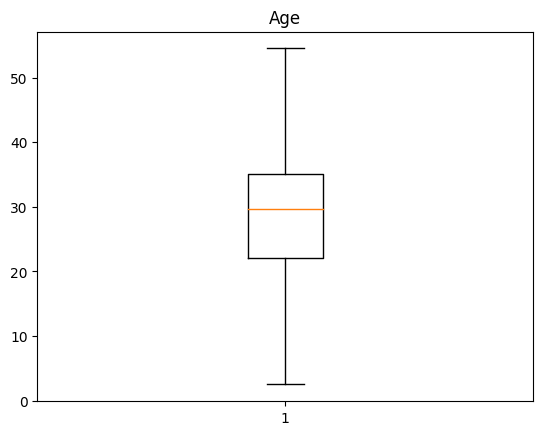

In [97]:
#After handling outliers
num_columns = ['SibSp', 'Fare', 'Parch','Age']
for i in num_columns:
  plt.figure()
  plt.boxplot(titanic_data[i])
  plt.title(i)
  plt.show()

In [98]:
# Drop unnecessary column
titanic_data=titanic_data.drop(['PassengerId','Name','Ticket'], axis=1)


In [99]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0,7.2500,S
1,1,1,female,38.0,1.0,0,65.6344,C
2,1,3,female,26.0,0.0,0,7.9250,S
3,1,1,female,35.0,1.0,0,53.1000,S
4,0,3,male,35.0,0.0,0,8.0500,S


In [100]:
titanic_data['Sex'].unique()


array(['male', 'female'], dtype=object)

In [101]:
titanic_data['Embarked'].unique()



array(['S', 'C', 'Q'], dtype=object)

In [102]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'])


In [103]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1.0,0,7.2500,0,0,1
1,1,1,1,38.0,1.0,0,65.6344,1,0,0
2,1,3,1,26.0,0.0,0,7.9250,0,0,1
3,1,1,1,35.0,1.0,0,53.1000,0,0,1
4,0,3,0,35.0,0.0,0,8.0500,0,0,1


In [104]:
# Separate features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

Create kNN and SVM models:

KNN

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

In [107]:
#seprating target and feauture variable
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]






KNeighborsClassifier(metric='euclidean')

In [108]:
#splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [109]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [113]:
#Create KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(algorithm='auto',n_neighbors = 5, metric = 'euclidean', weights='uniform')

In [114]:
# Train kNN model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [116]:
# Calculate precision, recall, and F1-score for kNN model
precision_knn = precision_score(y_test, knn_model.predict(X_test))
recall_knn = recall_score(y_test, knn_model.predict(X_test))
f1_knn = f1_score(y_test, knn_model.predict(X_test))

In [136]:
#pRINT Precision Score and F1 Score for KNN Model
print("Precision Score:", precision_knn)
print("Recall Score:", recall_knn)
print("F1 Score:", f1_knn)

Precision Score: 0.7580645161290323
Recall Score: 0.6811594202898551
F1 Score: 0.7175572519083969


In [129]:
# Predictions
y_pred_knn = knn_model.predict(X_test)

In [131]:
# Confusion matrix for kNN model
cm_knn = confusion_matrix(y_test, y_pred_knn)

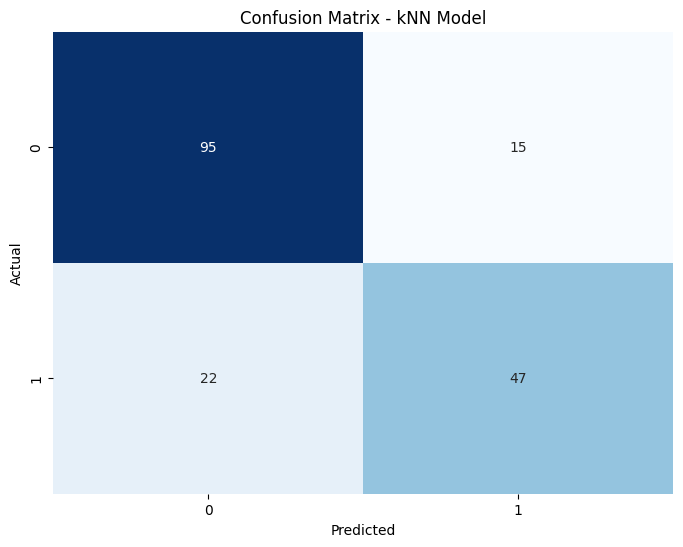

In [132]:
# Plot confusion matrix for kNN model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - kNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM Model

In [120]:
# Create SVM model
svm_model = SVC(kernel='linear', C=1.0)
# Train SVM model
svm_model.fit(X_train, y_train)
# Calculate precision, recall, and F1-score for SVM model
precision_svm = precision_score(y_test, svm_model.predict(X_test))
recall_svm = recall_score(y_test, svm_model.predict(X_test))
f1_svm = f1_score(y_test, svm_model.predict(X_test))

In [127]:
#Print Accuracy Score,Precision Score and F1 Score for SVM Model
print("Precision Score:", precision_svm)
print("Recall Score:", recall_svm)
print("F1 Score:", f1_svm)

Precision Score: 0.7580645161290323
Recall Score: 0.6811594202898551
F1 Score: 0.7175572519083969


In [134]:
# Predictions
y_pred_svm = svm_model.predict(X_test)
# Confusion matrix for SVM model
cm_svm = confusion_matrix(y_test, y_pred_svm)


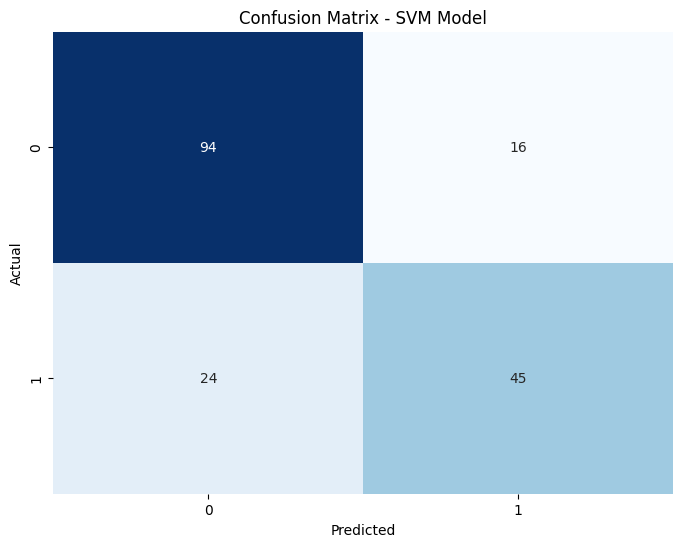

In [135]:
# Plot confusion matrix for SVM model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [122]:
# Perform k-fold cross-validation for accuracy
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [125]:
# kNN
knn_accuracy_scores = cross_val_score(knn_model, X_train, y_train, cv=k_fold, scoring='accuracy')
avg_accuracy_knn = knn_accuracy_scores.mean()

In [124]:
# SVM
svm_accuracy_scores = cross_val_score(svm_model, X_train, y_train, cv=k_fold, scoring='accuracy')
avg_accuracy_svm = svm_accuracy_scores.mean()

In [128]:
# Print Average Accuracy for KNN nad SVM
print("kNN Model:")
print("Average Accuracy (k-fold CV):", avg_accuracy_knn)

print("\nSVM Model:")
print("Average Accuracy (k-fold CV):", avg_accuracy_svm)

kNN Model:
Average Accuracy (k-fold CV): 0.8076877934272302

SVM Model:
Average Accuracy (k-fold CV): 0.78943661971831


Comclusion
THE MODEL k-NN HAS 0.80 ACCURACY AND BETTER THAN SVM MODEL